# Árboles de Decisión (Naive Bayes) (Python)
---

<img src='../Imagenes/arbol.png' style='width:20%;height:20%;float:left;margin-right:20px'>
Los árboles de decisión para la clasificación funcionan igual que los vistos para regresión.

La única diferencia es que el contenido de los nodos hojas son categorías en lugar de valores discretos

## Escenario del problema
---

<img src='../Imagenes/comprar.jpg' style='width:15%;height:15%;float:left;margin-right:20px'>
Una empresa de coches ha sacado un nuevo modelo al mercado. Le ha preguntado a una re  
¡Vamos a ello!

# EDA

In [1]:
# 1. Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from beautifultable import BeautifulTable as BT

from sklearn.model_selection import train_test_split as separar
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 2. Importar datos
datos = pd.read_csv('Credit Scoring.csv',
                        encoding= 'unicode_escape', sep=";")
datos.head(10)


,age,job,marital,education,default,Unnamed: 5,Unnamed: 6
0,30,unemployed,married,primary,no,NaN,NaN
1,33,services,married,secondary,no,NaN,NaN
2,35,management,single,tertiary,no,NaN,NaN
3,30,management,married,tertiary,no,NaN,NaN
4,59,blue-collar,married,secondary,no,NaN,NaN
5,35,management,single,tertiary,no,NaN,NaN
6,36,self-employed,married,tertiary,no,NaN,NaN
7,39,technician,married,secondary,no,NaN,NaN
8,41,entrepreneur,married,tertiary,no,NaN,NaN
9,43,services,married,primary,no,NaN,NaN


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4432 entries, 0 to 4431
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         4432 non-null   int64 
 1   job         4432 non-null   object
 2   marital     4432 non-null   object
 3   education   4432 non-null   object
 4   default     4432 non-null   object
 5   Unnamed: 5  2 non-null      object
 6   Unnamed: 6  1 non-null      object
dtypes: int64(1), object(6)
memory usage: 242.5+ KB


<Axes: >

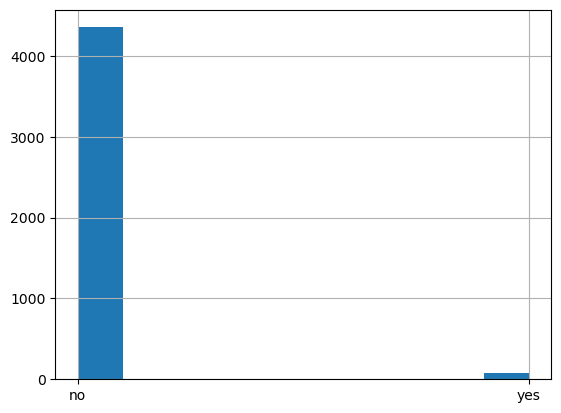

In [10]:
datos['default'].hist()

Hay un gran desbalance entre yes y no.

In [4]:
import pandas as pd

for column in datos.columns:
    num_categories = datos[column].nunique()
    print(f"Number of categories in '{column}': {num_categories}")


Number of categories in 'age': 46
Number of categories in 'job': 12
Number of categories in 'marital': 3
Number of categories in 'education': 4
Number of categories in 'default': 2
Number of categories in 'Unnamed: 5': 1
Number of categories in 'Unnamed: 6': 1


# Analisis de correlaciones

                age       job   marital  education   default
age        1.000000 -0.034519 -0.390541  -0.111364 -0.011075
job       -0.034519  1.000000  0.072599   0.170989  0.008777
marital   -0.390541  0.072599  1.000000   0.100660 -0.022265
education -0.111364  0.170989  0.100660   1.000000 -0.011552
default   -0.011075  0.008777 -0.022265  -0.011552  1.000000


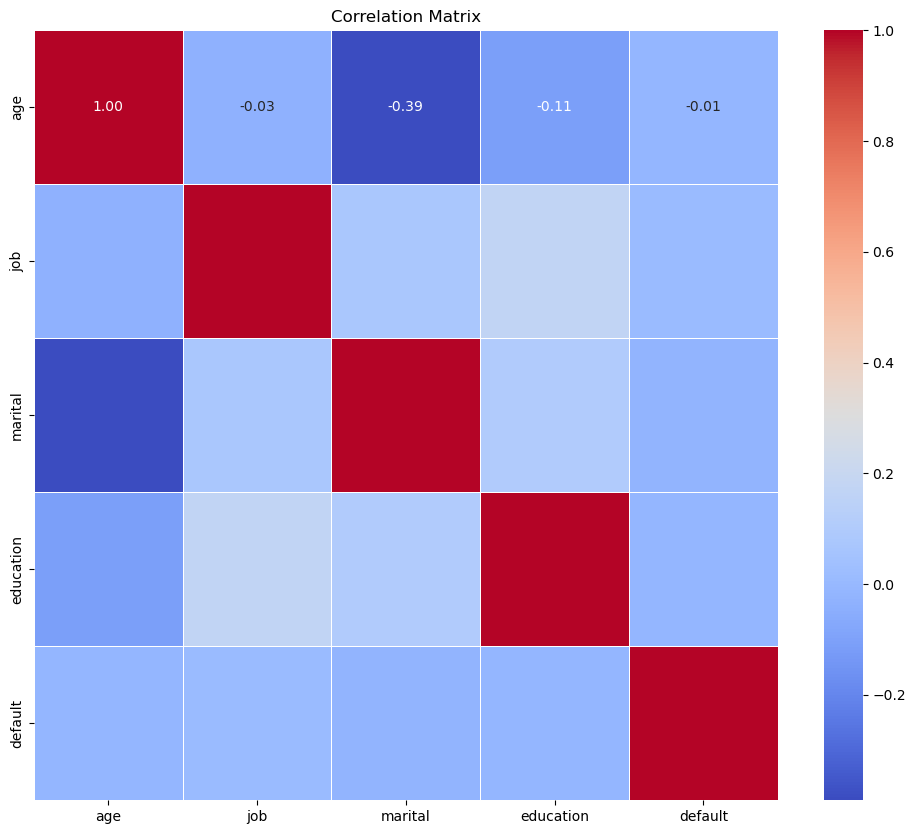

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder


# Select relevant columns for encoding
columnas_categoricas = ['job', 'marital', 'education']

# Extract numerical column 'age'
X_numerico = datos[['age']]

# Extract categorical columns
X_categorico = datos[columnas_categoricas]

# Use OrdinalEncoder for categorical encoding
encoder = OrdinalEncoder()
X_categorico_codificado = pd.DataFrame(encoder.fit_transform(X_categorico), columns=columnas_categoricas)

# Concatenate numerical and encoded categorical columns
X_encoded = pd.concat([X_numerico, X_categorico_codificado], axis=1)

# Encode the 'default' variable as categorical
encoder_default = OrdinalEncoder()
y_encoded = encoder_default.fit_transform(datos[['default']])

# Combine X_encoded and y_encoded for correlation analysis
data_encoded = pd.concat([X_encoded, pd.DataFrame(y_encoded, columns=['default'])], axis=1)

# Calculate correlation matrix
correlation_matrix = data_encoded.corr()
print(correlation_matrix)
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


Las correlaciones son muy bajas en general.

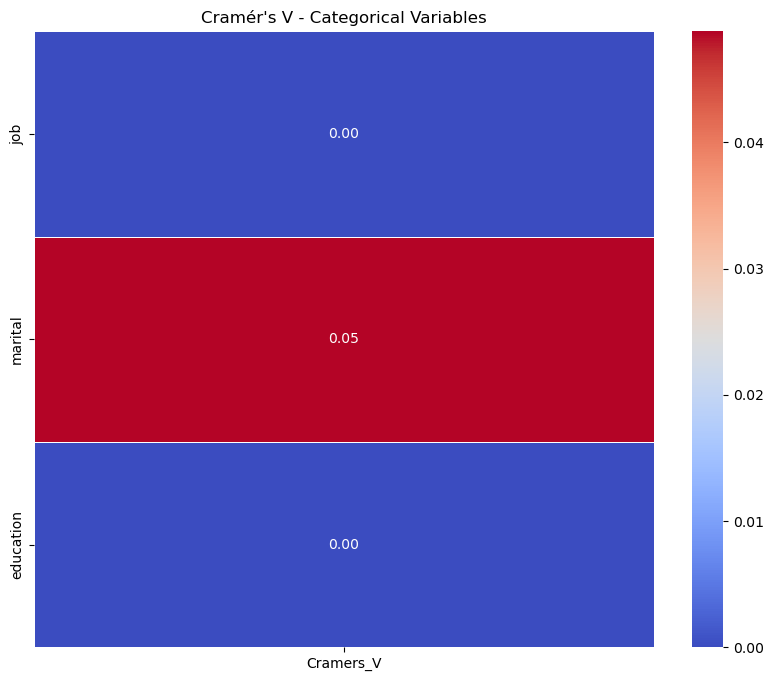

In [7]:
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import numpy as np
import seaborn as sns
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
# Assuming 'datos' is your original DataFrame

# Select relevant columns for encoding
columnas_categoricas = ['job', 'marital', 'education']

# Extract categorical columns
X_categorico = datos[columnas_categoricas]

# Encode the 'default' variable as categorical
encoder_default = OrdinalEncoder()
y_encoded = encoder_default.fit_transform(datos[['default']])

# Combine X_categorico and y_encoded for association analysis
data_categorico = pd.concat([X_categorico, pd.DataFrame(y_encoded, columns=['default'])], axis=1)

# Calculate Cramér's V for each categorical variable
cramers_v_values = {}
for column in X_categorico.columns:
    confusion_matrix = pd.crosstab(data_categorico[column], data_categorico['default'])
    cramers_v_values[column] = cramers_v(confusion_matrix)

# Create a DataFrame from the Cramér's V values
cramers_v_df = pd.DataFrame.from_dict(cramers_v_values, orient='index', columns=['Cramers_V'])

# Visualize the Cramér's V values as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=True)
plt.title("Cramér's V - Categorical Variables")
plt.show()




# Entrenamiento de modelos: Arbol de decision, Regrasion logística y Random forest

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

# Seleccionar las columnas relevantes para encoding
columnas_categoricas = ['job', 'marital', 'education']

# Extraer la columna numérica 'age'
X_numerico = datos[['age']]

# Extraer las columnas categóricas
X_categorico = datos[columnas_categoricas]

# Utilizar OrdinalEncoder para la codificación categórica
encoder = OrdinalEncoder()
X_categorico_codificado = pd.DataFrame(encoder.fit_transform(X_categorico), columns=columnas_categoricas)

# Concatenar las columnas numéricas y categóricas codificadas
X = pd.concat([X_numerico, X_categorico_codificado], axis=1)

# Codificar la variable 'default' como categórica
encoder_default = OrdinalEncoder()
y = encoder_default.fit_transform(datos[['default']])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

weights = {0:1, 1:100}
# Ajustar el modelo de árbol de decisión con ajuste de hiperparámetros
tree_classifier = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_leaf=5, class_weight='balanced')
tree_classifier.fit(X_train, y_train)
random_forest = RandomForestClassifier(class_weight='balanced')
random_forest.fit(X_train,y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = tree_classifier.predict(X_test)
y_pred_RF = random_forest.predict(X_test)
# Evaluar el modelo
accuracy_DT = accuracy_score(y_test, y_pred)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
# Ajustar el modelo de regresión logística
logistic_regression = LogisticRegression(class_weight='balanced', random_state=0)
logistic_regression.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_lr = logistic_regression.predict(X_test)

# Evaluar el modelo de regresión logística
accuracy_LR = accuracy_score(y_test, y_pred_lr)
print("Exactitud DT :", accuracy_DT)
print("Exactitud RF :", accuracy_RF)
print("Exactitud LR:", accuracy_LR)
print(len(y))

Exactitud DT : 0.7738296672306825
Exactitud RF : 0.9323181049069373
Exactitud LR: 0.542019176536943
4432


/Users/gustavo.aguado/anaconda3/envs/base_ml/lib/python3.9/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/gustavo.aguado/anaconda3/envs/base_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Métricas arbol de decision

Exactitud (Accuracy): 0.7738296672306825
Precisión (Precision): 0.7813394390383515
Sensibilidad (Recall): 0.986271676300578
Especificidad: 0.017994858611825194
Puntuación F1: 0.871925902267646


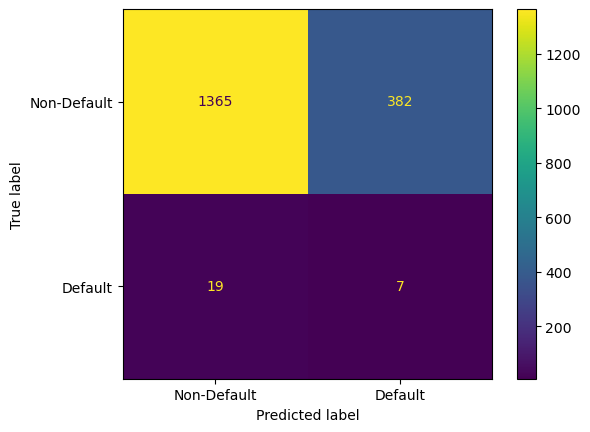

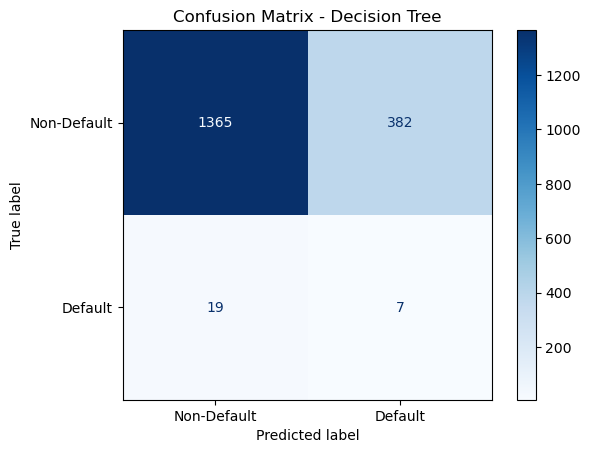

In [13]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
# 4. Evaluar el modelo de árbol de decisión usando una matriz de confusión
cm_tree = confusion_matrix(y_test, y_pred)

# 5. Calcular métricas a partir de la matriz de confusión
TP_tree = cm_tree[0, 0]
TN_tree = cm_tree[1, 1]
FP_tree = cm_tree[0, 1]
FN_tree = cm_tree[1, 0]

accuracy_tree = (TP_tree + TN_tree) / (TP_tree + TN_tree + FP_tree + FN_tree)
precision_tree = TP_tree / (TP_tree + FP_tree)
recall_tree = TP_tree / (TP_tree + FN_tree)
specificity_tree = TN_tree / (TN_tree + FP_tree)
f1_score_tree = 2 * (precision_tree * recall_tree) / (precision_tree + recall_tree)

# Imprimir las métricas calculadas
print("Exactitud (Accuracy):", accuracy_tree)
print("Precisión (Precision):", precision_tree)
print("Sensibilidad (Recall):", recall_tree)
print("Especificidad:", specificity_tree)
print("Puntuación F1:", f1_score_tree)

# Display confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(tree_classifier, X_test, y_test, display_labels=['Non-Default', 'Default'])
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Decision Tree')
plt.show()



# Metricas regresion logística

Exactitud (Accuracy) LR: 0.542019176536943
Precisión (Precision) LR: 0.542644533485976
Sensibilidad (Recall) LR: 0.9864724245577523
Especificidad LR: 0.01600985221674877
Puntuación F1 LR: 0.7001477104874446


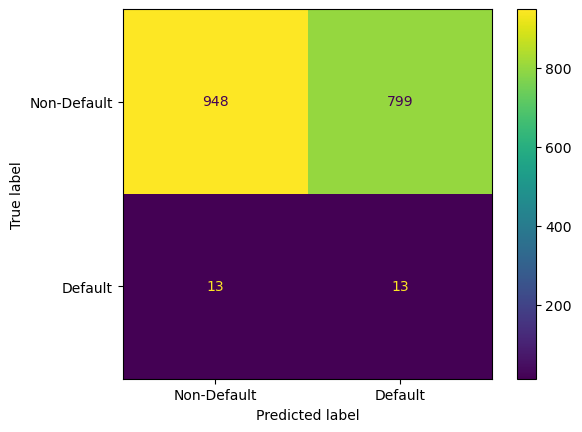

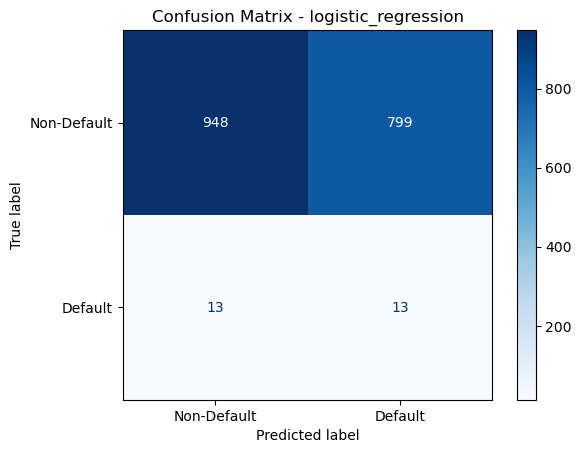

In [14]:
# 4. Evaluar el modelo de regresión logística usando una matriz de confusión
cm_lr = confusion_matrix(y_test, y_pred_lr)

# 5. Calcular métricas a partir de la matriz de confusión
TP_lr = cm_lr[0, 0]
TN_lr = cm_lr[1, 1]
FP_lr = cm_lr[0, 1]
FN_lr = cm_lr[1, 0]

accuracy_lr = (TP_lr + TN_lr) / (TP_lr + TN_lr + FP_lr + FN_lr)
precision_lr = TP_lr / (TP_lr + FP_lr)
recall_lr = TP_lr / (TP_lr + FN_lr)
specificity_lr = TN_lr / (TN_lr + FP_lr)
f1_score_lr = 2 * (precision_lr * recall_lr) / (precision_lr + recall_lr)

# Imprimir las métricas calculadas
print("Exactitud (Accuracy) LR:", accuracy_lr)
print("Precisión (Precision) LR:", precision_lr)
print("Sensibilidad (Recall) LR:", recall_lr)
print("Especificidad LR:", specificity_lr)
print("Puntuación F1 LR:", f1_score_lr)

# Display confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(logistic_regression, X_test, y_test, display_labels=['Non-Default', 'Default'])
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - logistic_regression')
plt.show()

# Métricas Random Forest

Exactitud RF: 0.9323181049069373
Precisión RF: 0.9456210646823126
Sensibilidad RF: 0.9850924269528921
Especificidad RF: 0.010416666666666666
Puntuación F1 RF: 0.9649532710280374


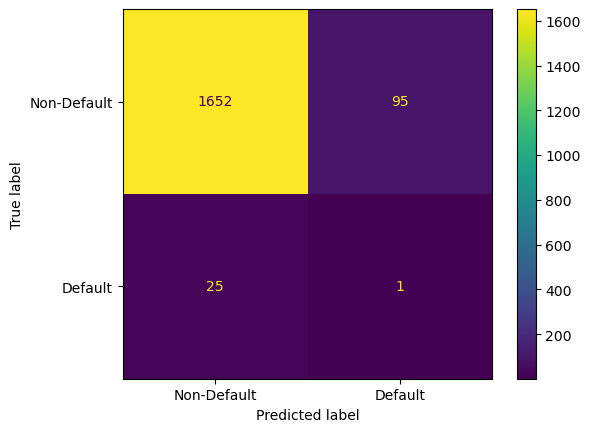

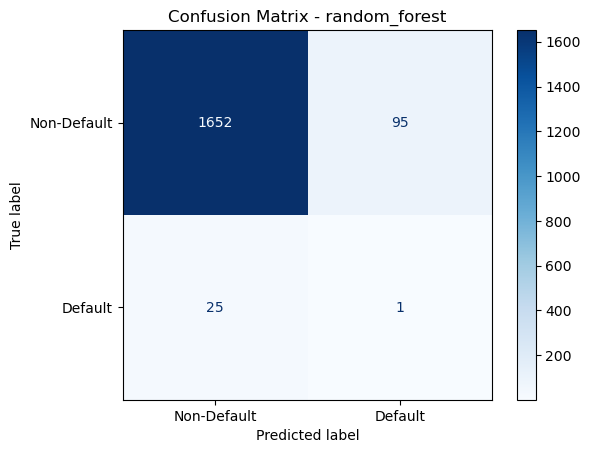

Reporte de Clasificación (Random Forest):
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.96      1747
         1.0       0.01      0.04      0.02        26

    accuracy                           0.93      1773
   macro avg       0.50      0.49      0.49      1773
weighted avg       0.97      0.93      0.95      1773



In [15]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
TP_RF = cm_RF[0, 0]
TN_RF = cm_RF[1, 1]
FP_RF = cm_RF[0, 1]
FN_RF = cm_RF[1, 0]
precision_RF = TP_RF / (TP_RF + FP_RF)
recall_RF = TP_RF / (TP_RF + FN_RF)
specificity_RF = TN_RF / (TN_RF + FP_RF)
f1_score_RF = 2 * (precision_RF * recall_RF) / (precision_RF + recall_RF)

# Imprimir las métricas para el clasificador de bosque aleatorio
print("Exactitud RF:", accuracy_RF)
print("Precisión RF:", precision_RF)
print("Sensibilidad RF:", recall_RF)
print("Especificidad RF:", specificity_RF)
print("Puntuación F1 RF:", f1_score_RF)

# Display confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test, display_labels=['Non-Default', 'Default'])
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - random_forest')
plt.show()
print("Reporte de Clasificación (Random Forest):")
print(classification_report(y_test, y_pred_RF))

# Conclusión
Las metricas son buenas, excluyendo la especificidad a la clase negrativa, la cual es bastante baja. Esto se debe a lo desbalanceadas que estan las clases.